In [15]:
import pandas as pd

#let's take a look at the data we will be looking at

conv = pd.read_csv("convenience.csv")
conv.head(10)

,Client ID,Name,Legal Name,Start Date,Street #,Street Name,State,Zip,Lat,Lon,Accuracy,Category
0,201211150002,Avalon Fuel,Avalon Fuel Company,10/26/2012,901,Ohio River Blvd,PA,15202.0,40.495759,-80.066508,9.0,Convenience Store
1,201511040005,Ez Energy #303/7Eleven #36183H,Neelkanth Ansh Enterprises Inc,10/26/2015,209,Ohio River Blvd,PA,15143.0,40.545418,-80.194152,9.0,Convenience Store
2,201212130003,EZ Energy #311 / 7 Eleven #36191H,7 Eleven Inc,12/3/2012,8136,Ohio River Blvd,PA,15202.0,40.510522,-80.094268,9.0,Convenience Store
3,201211190006,Getgo #3646 / Crafton - Ingram,Giant Eagle Inc,11/15/2012,280,Crafton Ingram Shopping circle,PA,15205.0,41.203322,-77.194525,3.0,Convenience Store
4,53583,Mt NeBlvd Texaco,Mt NeBlvd Texaco,6/2/1995,1706,Mt Nebo Rd,PA,15143.0,40.553281,-80.109158,8.0,Convenience Store
5,201304220008,Radokovic Marathon,Radokovic Enterprises LlC,4/16/2013,1826,Lincoln Highway,PA,15137.0,40.367923,-79.780429,9.0,Convenience Store
6,200002290002,Sunoco #7544,Sunoco Inc R&M,2/2/2000,1201,Airport Blvdulevard,PA,15231.0,40.494177,-80.267208,9.0,Convenience Store
7,52845,Sunoco A Plus Mini Market #8154,NaN,10/25/1994,5204,Interbo Ave,PA,15207.0,40.370214,-79.913195,9.0,Convenience Store
8,201310080001,Plow & Hearth,Plow & Hearth LLC,9/25/2013,1710,Settlers Ridge Center Dr,PA,15205.0,40.440641,-80.149132,5.0,Convenience Store
9,43192,S & R Market,Mac's Convenience Stores LLC,1/11/1988,4915,2nd Ave,PA,15207.0,40.529076,-80.025577,5.0,Convenience Store


In [16]:
#because the data has the zip code rather than the neighborhoods, let's use a dictionary to map zip code to neighborhood
#Note: some zip codes map to more than one neighborhood

zipdict = {15201: ["LAWRENCEVILLE",  "STANTON HEIGHTS"], 15203: ["SOUTHSIDE"], 15206: ["EAST LIBERTY", "MORNINGSIDE", "EAST END"], 15207: ["HAZELWOOD", "GREENFIELD", "GLENWOOD", "GLEN HAZEL", "HAYS", "LINCOLN PL"], 15208: ["HOMEWOOD", "BRUSHTON", "EAST END", "POINT BREEZE"], 
           15210: ["MT WASHINGTON", "DUQUESNE HEIGHTS"], 15213: ["OAKLAND", "BELLEFIELD"], 15217: ["SQUIRREL HILL", "GREENFIELD", "BROWNS HILL"], 15219: ["UPTOWN", "HERRON HILL", "SCHENLEY HEIGHTS"], 15222: ["DOWNTOWN"], 15224: ["BLOOMFIELD", "GARFIELD"], 15226: ["BROOKLINE", "OVERBROOK"],
           15230: ["VETERAN’S HOSPITAL"], 15260: ["THE UNIVERSITY OF PITTSBURGH"], 15282: ["DUQUESNE UNIVERSITY"]}

In [17]:
#make dictionaries that will keep track of how many convenience stores and supermarkets respectively there are in each neighborhood

convenience = {}
supermarket = {}
for index, row in conv.iterrows():
    try:
        zip_code = int(row['Zip'])
        if zip_code in zipdict:
            for neighborhood in zipdict[zip_code]:
                if row['Category'] == "Convenience Store":
                    if neighborhood in convenience:
                        convenience[neighborhood] += 1
                    else:
                        convenience[neighborhood] = 1
                elif row['Category'] == "Supermarket":
                    if neighborhood in supermarket:
                        supermarket[neighborhood] += 1
                    else:
                        supermarket[neighborhood] = 1
                    
    except:
        continue
print(convenience)
print(supermarket)

{'HAZELWOOD': 4, 'GREENFIELD': 11, 'GLENWOOD': 4, 'GLEN HAZEL': 4, 'HAYS': 4, 'LINCOLN PL': 4, 'DOWNTOWN': 17, 'MT WASHINGTON': 14, 'DUQUESNE HEIGHTS': 14, 'UPTOWN': 16, 'HERRON HILL': 16, 'SCHENLEY HEIGHTS': 16, 'HOMEWOOD': 5, 'BRUSHTON': 5, 'EAST END': 18, 'POINT BREEZE': 5, 'SQUIRREL HILL': 7, 'BROWNS HILL': 7, 'EAST LIBERTY': 13, 'MORNINGSIDE': 13, 'BROOKLINE': 6, 'OVERBROOK': 6, 'OAKLAND': 14, 'BELLEFIELD': 14, 'LAWRENCEVILLE': 6, 'STANTON HEIGHTS': 6, 'SOUTHSIDE': 6, 'BLOOMFIELD': 8, 'GARFIELD': 8, 'DUQUESNE UNIVERSITY': 1}
{'BROOKLINE': 2, 'OVERBROOK': 2, 'BLOOMFIELD': 3, 'GARFIELD': 3, 'LAWRENCEVILLE': 1, 'STANTON HEIGHTS': 1, 'HOMEWOOD': 1, 'BRUSHTON': 1, 'EAST END': 5, 'POINT BREEZE': 1, 'MT WASHINGTON': 4, 'DUQUESNE HEIGHTS': 4, 'EAST LIBERTY': 4, 'MORNINGSIDE': 4, 'SQUIRREL HILL': 4, 'GREENFIELD': 4, 'BROWNS HILL': 4, 'SOUTHSIDE': 2, 'UPTOWN': 1, 'HERRON HILL': 1, 'SCHENLEY HEIGHTS': 1, 'DOWNTOWN': 4, 'OAKLAND': 3, 'BELLEFIELD': 3}


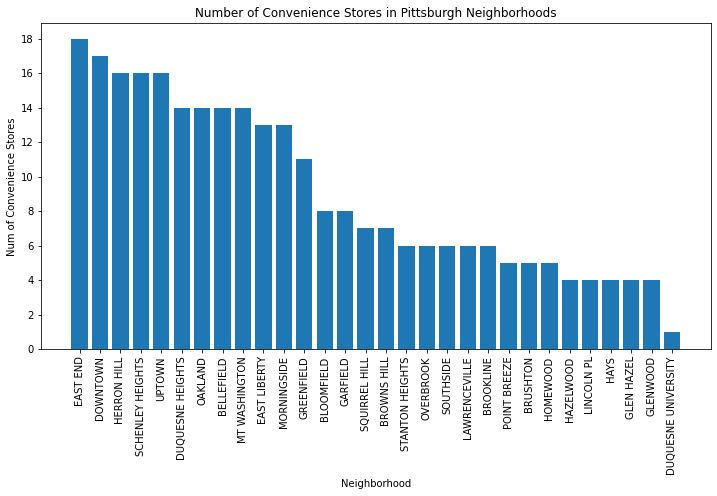

In [18]:
#let's visualize the convenience store data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(list(convenience.items()), columns=['Neighborhood', 'Num of Convenience Stores'])

#largest to smallest
df = df.sort_values(by='Num of Convenience Stores', ascending=False)

#bar graph
plt.figure(figsize=(12, 6))
plt.bar(df['Neighborhood'], df['Num of Convenience Stores'])
plt.xlabel('Neighborhood')
plt.ylabel('Num of Convenience Stores')
plt.title('Number of Convenience Stores in Pittsburgh Neighborhoods')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(df['Num of Convenience Stores'])+1, 2))
plt.show()

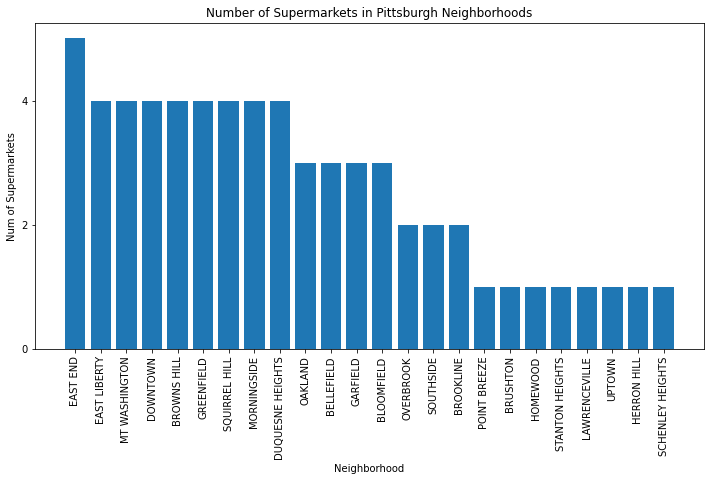

In [19]:
#let's visualize the supermarket data

df = pd.DataFrame(list(supermarket.items()), columns=['Neighborhood', 'Num of Supermarkets'])

#largest to smallest
df = df.sort_values(by='Num of Supermarkets', ascending=False)

#bar graph
plt.figure(figsize=(12, 6))
plt.bar(df['Neighborhood'], df['Num of Supermarkets'])
plt.xlabel('Neighborhood')
plt.ylabel('Num of Supermarkets')
plt.title('Number of Supermarkets in Pittsburgh Neighborhoods')
plt.xticks(rotation=90)
plt.yticks(np.arange(0, max(df['Num of Supermarkets'])+1, 2))
plt.show()

Looking just at the convenience store data, we see that East End has the highest number of convenience stores. Second place is downtown and third place has a three-way tie: Herron Hill, Schenley Heights, and Uptown. 

Now looking at the supermarket data, we see that East End has the highest number of supermarkets. followed by a eight-way tie with East Liberty, Mt. Washington, Downtown, Browns Hill, Greenfield, Squirrel Hill, Morningside, and Dueuqesne Heights. 

The one they both have in common is East End as being the best for the criteria of the number of convenience stores and supermarket.